 # Import libraries

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from pandas.api.types import CategoricalDtype

# Read raw  data

In [ ]:
import os

# Set up directory
os.chdir("/home/siti/Downloads/New NHS Data")

# Load the CSV data into a pandas DataFrame
raw_data =  pd.read_csv('AE_Synthetic_Data_Final_V02.csv')

# Display the first few rows of the DataFrame
#print(raw_data.head())


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65836575 entries, 0 to 65836574
Data columns (total 18 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   IMD_Decile_From_LSOA             float64
 1   Age_Band                         object 
 2   Sex                              float64
 3   AE_Arrive_Date                   object 
 4   AE_Arrive_HourOfDay              object 
 5   AE_Time_Mins                     int64  
 6   AE_HRG                           object 
 7   AE_Num_Diagnoses                 int64  
 8   AE_Num_Investigations            int64  
 9   AE_Num_Treatments                int64  
 10  AE_Arrival_Mode                  int64  
 11  Provider_Patient_Distance_Miles  float64
 12  ProvID                           int64  
 13  Admitted_Flag                    float64
 14  Admission_Method                 object 
 15  ICD10_Chapter_Code               object 
 16  Treatment_Function_Code          object 
 17  Length

## Create a copy of data 

In [4]:
# Make a copy of data for admitted patients only
non_admitted = raw_data[(raw_data['Admitted_Flag'] == 0.0) ]
admitted_data = raw_data[(raw_data['Admitted_Flag'] == 1.0) ]


#print(admitted_data.head())



12992639


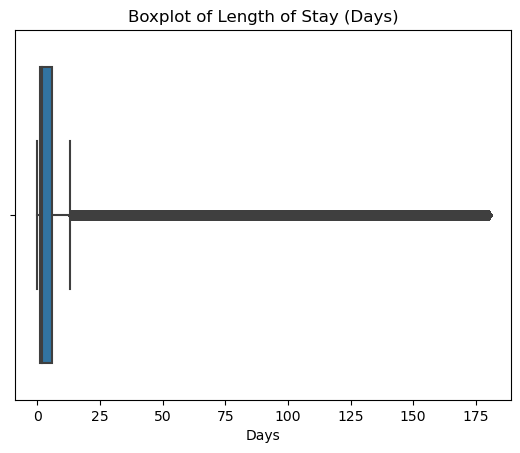

Total number of instances: 13113928
Number of null values: 121289
Total number of instances with Length of Stay of 21 days or more: 799996


In [16]:
print(admitted_data['Length_Of_Stay_Days'].count())

sns.boxplot(x=admitted_data['Length_Of_Stay_Days'])
plt.title('Boxplot of Length of Stay (Days)')
plt.xlabel('Days')
plt.show()

total_instances = admitted_data['Length_Of_Stay_Days'].shape[0]
null_values = admitted_data['Length_Of_Stay_Days'].isna().sum()

print(f"Total number of instances: {total_instances}")
print(f"Number of null values: {null_values}")

# Count the instances where Length_Of_Stay_Days >= 21
instances_21_or_more = admitted_data[admitted_data['Length_Of_Stay_Days'] >= 21].shape[0]

print(f"Total number of instances with Length of Stay of 21 days or more: {instances_21_or_more}")



2395


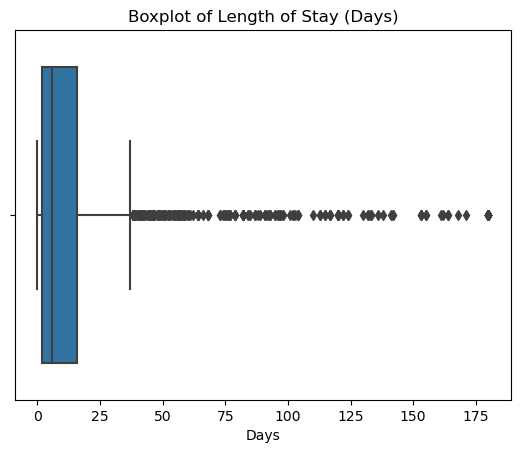

Total number of instances: 52722236
Number of null values: 52719841
Total number of instances with Length of Stay of 21 days or more: 476


In [18]:
print(non_admitted['Length_Of_Stay_Days'].count())

sns.boxplot(x=non_admitted['Length_Of_Stay_Days'])
plt.title('Boxplot of Length of Stay (Days)')
plt.xlabel('Days')
plt.show()

total_instances = non_admitted['Length_Of_Stay_Days'].shape[0]
null_values = non_admitted['Length_Of_Stay_Days'].isna().sum()

print(f"Total number of instances: {total_instances}")
print(f"Number of null values: {null_values}")

# Count the instances where Length_Of_Stay_Days >= 21
instances_21_or_more = non_admitted[non_admitted['Length_Of_Stay_Days'] >= 21].shape[0]

print(f"Total number of instances with Length of Stay of 21 days or more: {instances_21_or_more}")

# Data Structure
* Number of rows is 13113928, and number of columns is 18

In [19]:
print(admitted_data.shape) ## (13113928, 18)

print(admitted_data.info()) 



(13113928, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13113928 entries, 0 to 65836558
Data columns (total 18 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   IMD_Decile_From_LSOA             float64
 1   Age_Band                         object 
 2   Sex                              float64
 3   AE_Arrive_Date                   object 
 4   AE_Arrive_HourOfDay              object 
 5   AE_Time_Mins                     int64  
 6   AE_HRG                           object 
 7   AE_Num_Diagnoses                 int64  
 8   AE_Num_Investigations            int64  
 9   AE_Num_Treatments                int64  
 10  AE_Arrival_Mode                  int64  
 11  Provider_Patient_Distance_Miles  float64
 12  ProvID                           int64  
 13  Admitted_Flag                    float64
 14  Admission_Method                 object 
 15  ICD10_Chapter_Code               object 
 16  Treatment_Function_Code          obje

In [20]:
print(admitted_data['ProvID'].nunique())

238


In [21]:
print(non_admitted.shape) ## 

print(non_admitted.info()) 

(52722236, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52722236 entries, 1 to 65836574
Data columns (total 18 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   IMD_Decile_From_LSOA             float64
 1   Age_Band                         object 
 2   Sex                              float64
 3   AE_Arrive_Date                   object 
 4   AE_Arrive_HourOfDay              object 
 5   AE_Time_Mins                     int64  
 6   AE_HRG                           object 
 7   AE_Num_Diagnoses                 int64  
 8   AE_Num_Investigations            int64  
 9   AE_Num_Treatments                int64  
 10  AE_Arrival_Mode                  int64  
 11  Provider_Patient_Distance_Miles  float64
 12  ProvID                           int64  
 13  Admitted_Flag                    float64
 14  Admission_Method                 object 
 15  ICD10_Chapter_Code               object 
 16  Treatment_Function_Code          obje

## Missing Values Analysis

In [22]:
# Get the number of missing cases per column

#df.replace('NaN', np.nan, inplace=True)

missing_values = admitted_data.isnull().sum()

print(missing_values)

IMD_Decile_From_LSOA                63513
Age_Band                                0
Sex                                118326
AE_Arrive_Date                          0
AE_Arrive_HourOfDay                118449
AE_Time_Mins                            0
AE_HRG                              61149
AE_Num_Diagnoses                        0
AE_Num_Investigations                   0
AE_Num_Treatments                       0
AE_Arrival_Mode                         0
Provider_Patient_Distance_Miles     63513
ProvID                                  0
Admitted_Flag                           0
Admission_Method                    63513
ICD10_Chapter_Code                 338861
Treatment_Function_Code            121247
Length_Of_Stay_Days                121289
dtype: int64


In [23]:
# Create a DataFrame from the Series
missing_values_df = pd.DataFrame(missing_values, columns=['Missing Cases'])

# Calculate the number of complete cases
missing_values_df['Complete Cases'] = len(admitted_data) - missing_values_df['Missing Cases']

# Calculate the proportion of missing cases
missing_values_df['% of Missing Cases'] = (missing_values_df['Missing Cases'] / len(admitted_data)) * 100

# Print the DataFrame
missing_values_df

,Missing Cases,Complete Cases,% of Missing Cases
IMD_Decile_From_LSOA,63513,13050415,0.484317
Age_Band,0,13113928,0.000000
Sex,118326,12995602,0.902293
AE_Arrive_Date,0,13113928,0.000000
AE_Arrive_HourOfDay,118449,12995479,0.903231
AE_Time_Mins,0,13113928,0.000000
AE_HRG,61149,13052779,0.466290
AE_Num_Diagnoses,0,13113928,0.000000
AE_Num_Investigations,0,13113928,0.000000
AE_Num_Treatments,0,13113928,0.000000


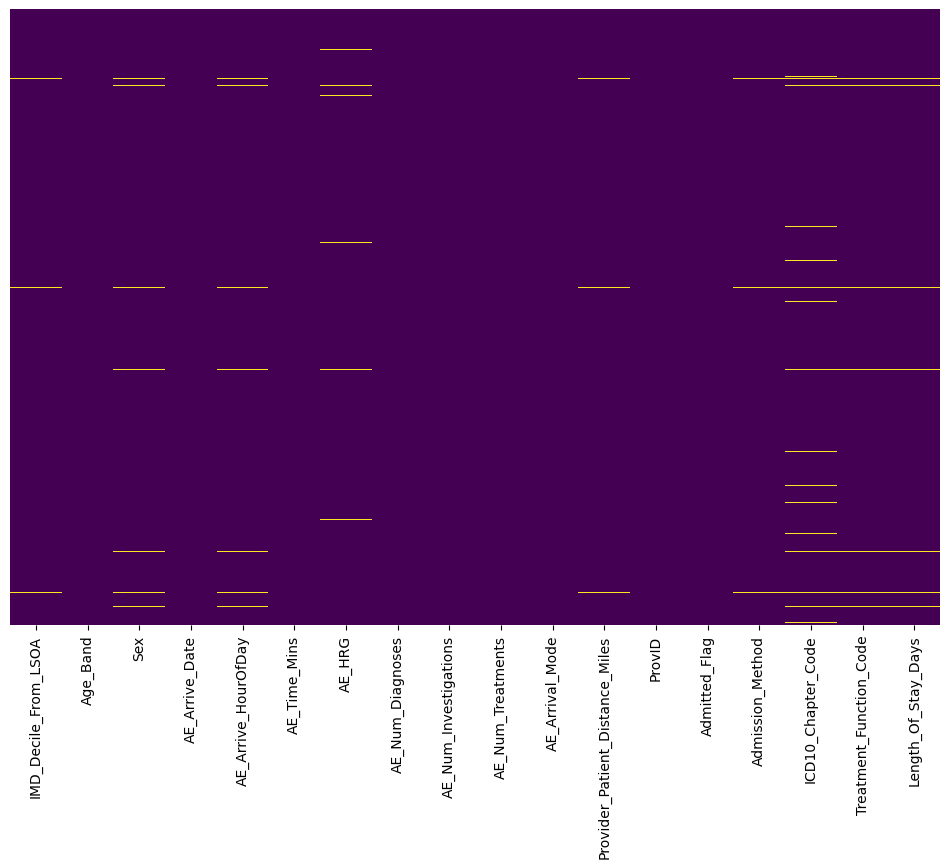

In [6]:
# Plot a heatmap of the missing values
plt.figure(figsize=(12,8))Please 
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()


The heatmap shows the pattern of missing values in the dataset. The x-axis refers to the columns wheareas the y-axis refers to row number at which the missing values are found.

Each yellow bar corresponds to the missing values in a particular column and at a particular row. On the other hand, purple regions are the complete cases.

Based on this heatmap, I can see that:

* The yellow bars are going across the width of the heatmap, meaning that there are some missing values at specific rows of the dataset. In other words, there are some missing data across multiple features or variables.

* Since there are only a small percentage of missing values observed in comparison to the total values in the dataset, it is considerably safe to remove the rows with the missing values. 

## Drop missing values 

* There are 391712 rows with missing values across the columns in the data set

In [24]:
# Identify rows with missing values
missing_rows = admitted_data[admitted_data.isnull().any(axis=1)]
no_missing_rows = admitted_data.isnull().any(axis=1).sum()
                   
print(missing_rows.head()) 
print(no_missing_rows) # [391712 rows x 18 columns]

      IMD_Decile_From_LSOA Age_Band  Sex       AE_Arrive_Date  \
158                    3.0    65-84  1.0  2016-12-14 00:00:00   
613                    9.0    45-64  2.0  2014-08-23 00:00:00   
683                    5.0    65-84  1.0  2017-06-20 00:00:00   
1100                   9.0      85+  2.0  2016-04-12 00:00:00   
1109                   NaN      85+  NaN  2018-03-07 00:00:00   

     AE_Arrive_HourOfDay  AE_Time_Mins   AE_HRG  AE_Num_Diagnoses  \
158                01-04           330     High                 0   
613                09-12             0      Low                 1   
683                21-24           190      Low                 1   
1100               21-24           110     High                 1   
1109                 NaN           150  Nothing                 1   

      AE_Num_Investigations  AE_Num_Treatments  AE_Arrival_Mode  \
158                       6                  9                1   
613                       1                  1              

In [25]:
# Drop the missing values 
complete_df = admitted_data.dropna()

# Double check the no. of missing values in the complete dataset
print(complete_df.isnull().sum())

IMD_Decile_From_LSOA               0
Age_Band                           0
Sex                                0
AE_Arrive_Date                     0
AE_Arrive_HourOfDay                0
AE_Time_Mins                       0
AE_HRG                             0
AE_Num_Diagnoses                   0
AE_Num_Investigations              0
AE_Num_Treatments                  0
AE_Arrival_Mode                    0
Provider_Patient_Distance_Miles    0
ProvID                             0
Admitted_Flag                      0
Admission_Method                   0
ICD10_Chapter_Code                 0
Treatment_Function_Code            0
Length_Of_Stay_Days                0
dtype: int64


In [26]:
complete_df['ProvID'].nunique()

197

## Complete data structure
* The complete data frame has 12722216 entries and 18 columns
* Memory usage: 1.8+ GB

In [28]:
print(complete_df.info())

print('Data shape:', complete_df.shape)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 12722216 entries, 0 to 65836547
Data columns (total 18 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   IMD_Decile_From_LSOA             float64
 1   Age_Band                         object 
 2   Sex                              float64
 3   AE_Arrive_Date                   object 
 4   AE_Arrive_HourOfDay              object 
 5   AE_Time_Mins                     int64  
 6   AE_HRG                           object 
 7   AE_Num_Diagnoses                 int64  
 8   AE_Num_Investigations            int64  
 9   AE_Num_Treatments                int64  
 10  AE_Arrival_Mode                  int64  
 11  Provider_Patient_Distance_Miles  float64
 12  ProvID                           int64  
 13  Admitted_Flag                    float64
 14  Admission_Method                 object 
 15  ICD10_Chapter_Code               object 
 16  Treatment_Function_Code          object 
 17  Length

# Data Cleaning

## 1. IMD Category

In [29]:
df = complete_df.copy()

print(df.isnull().sum())

IMD_Decile_From_LSOA               0
Age_Band                           0
Sex                                0
AE_Arrive_Date                     0
AE_Arrive_HourOfDay                0
AE_Time_Mins                       0
AE_HRG                             0
AE_Num_Diagnoses                   0
AE_Num_Investigations              0
AE_Num_Treatments                  0
AE_Arrival_Mode                    0
Provider_Patient_Distance_Miles    0
ProvID                             0
Admitted_Flag                      0
Admission_Method                   0
ICD10_Chapter_Code                 0
Treatment_Function_Code            0
Length_Of_Stay_Days                0
dtype: int64


In [30]:
print(df['IMD_Decile_From_LSOA'].unique())

[ 2.  4.  8.  1.  3. 10.  5.  9.  6.  7.]


In [31]:
bins = [0., 2., 4., 6., 8., 10.]

labels = ['Most deprived 20%', '20% - 40%', '40 - 60%', '60% - 80%', 'Least deprived 20%']

# Convert IMD Category column to ordinal categories
df['IMD_Category'] = pd.cut(df['IMD_Decile_From_LSOA'], bins = bins, labels = labels)

# Convert the IMD Category column to an ordinal data type
df['IMD_Category']  = pd.Categorical(df['IMD_Category'], categories=labels, ordered=True)

print(df['IMD_Category'].head())

0     Most deprived 20%
5             20% - 40%
6             60% - 80%
22    Most deprived 20%
28    Most deprived 20%
Name: IMD_Category, dtype: category
Categories (5, object): ['Most deprived 20%' < '20% - 40%' < '40 - 60%' < '60% - 80%' < 'Least deprived 20%']


In [32]:
print(df[['IMD_Decile_From_LSOA', 'IMD_Category']].head())

    IMD_Decile_From_LSOA       IMD_Category
0                    2.0  Most deprived 20%
5                    4.0          20% - 40%
6                    8.0          60% - 80%
22                   2.0  Most deprived 20%
28                   1.0  Most deprived 20%


## 2. Age Bands

In [33]:
print(df['Age_Band'].unique())

['65-84' '85+' '45-64' '1-17' '25-44' '18-24']


In [34]:
#  Change age band category
df['Age_Band'] = df['Age_Band'].replace('1-17', '01-17')

# Order age band
age_band_order = ['01-17', '18-24', '25-44', '45-64', '65-84', '85+']

# Convert the 'Age_Band' column to a category type with the specified order
df['Age_Band'] = pd.Categorical(df['Age_Band'], categories=age_band_order, ordered=True)

print(df['Age_Band'].head())

0     65-84
5       85+
6     65-84
22    65-84
28    45-64
Name: Age_Band, dtype: category
Categories (6, object): ['01-17' < '18-24' < '25-44' < '45-64' < '65-84' < '85+']


## 3. Sex

In [35]:
print(df['Sex'].unique())

[1. 2.]


In [36]:
#  Original Sex categories -->  [ 1.  2. ]

## 1 = Male
## 2 = Female

# Replace the sex categories
df['Sex'] = df['Sex'].replace({1.: 'Male', 2.: 'Female'})

# Change the dtype to category
df['Sex'] = df['Sex'].astype('category')

print(df['Sex'].head())


0       Male
5     Female
6     Female
22      Male
28      Male
Name: Sex, dtype: category
Categories (2, object): ['Female', 'Male']


## 4. A&E Arrival Date 

In [37]:
# Convert 'AE_Arrive_Date' to datetime
df['AE_Arrive_Date'] = pd.to_datetime(df['AE_Arrive_Date'])

print(df['AE_Arrive_Date'].head())

0    2015-07-02
5    2015-09-30
6    2015-02-04
22   2015-04-26
28   2017-08-04
Name: AE_Arrive_Date, dtype: datetime64[ns]


## 4.1 Derive A&E Arrival Month

In [38]:
import calendar

# Extract month
df['Month'] = df['AE_Arrive_Date'].dt.month

# Convert month numbers to month names
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

print(df['Month'].head()) 

0          July
5     September
6      February
22        April
28       August
Name: Month, dtype: object


## 4.2 Derive A&E Arrival Day (Weekend/Weekday)

In [39]:
# Extract day of week
df['DayOfWeek'] = df['AE_Arrive_Date'].dt.dayofweek

# Create a new column to check if the day is a weekday or a weekend
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

print(df['IsWeekend'].head())

0     Weekday
5     Weekday
6     Weekday
22    Weekend
28    Weekday
Name: IsWeekend, dtype: object


## 5. A&3 Arrival Hour of Day

In [40]:
print(df['AE_Arrive_HourOfDay'].unique())

['17-20' '13-16' '09-12' '01-04' '21-24' '05-08']


In [41]:
AE_Arrive_HourOfDay_Order = ['01-04', '05-08', '09-12', '13-16', '17-20', '21-24']

df['AE_Arrive_HourOfDay'] = pd.Categorical(df['AE_Arrive_HourOfDay'], 
                                           categories=AE_Arrive_HourOfDay_Order, 
                                           ordered=True)

print(df['AE_Arrive_HourOfDay'].head())

0     17-20
5     13-16
6     09-12
22    13-16
28    13-16
Name: AE_Arrive_HourOfDay, dtype: category
Categories (6, object): ['01-04' < '05-08' < '09-12' < '13-16' < '17-20' < '21-24']


## 6. A&E HRG

In [42]:
print(df['AE_HRG'].unique())

['High' 'Low' 'Nothing' 'Medium']


In [43]:
# change dtype to category
AE_HRG_Order = ['Nothing', 'Low', 'Medium', 'High']

df['AE_HRG'] = pd.Categorical(df['AE_HRG'],
                             categories = AE_HRG_Order,
                             ordered = True)


print(df['AE_HRG'].head())

0        High
5         Low
6     Nothing
22        Low
28       High
Name: AE_HRG, dtype: category
Categories (4, object): ['Nothing' < 'Low' < 'Medium' < 'High']


 ## 7. AE_Arrival_Mode 

In [44]:
print(df['AE_Arrival_Mode'].unique())

[2 1 0]


In [45]:
# Rename the arrival mode categories
df['AE_Arrival_Mode'] = df['AE_Arrival_Mode'].replace({0: 'Ambulance', 1: 'Other', 2: 'Not known'})

# change dtype to category
df['AE_Arrival_Mode'] = df['AE_Arrival_Mode'].astype('category')

print(df['AE_Arrival_Mode'].head())



0     Not known
5         Other
6         Other
22    Not known
28    Not known
Name: AE_Arrival_Mode, dtype: category
Categories (3, object): ['Ambulance', 'Not known', 'Other']


## 8. Admission_Method 

Below are the admission methods available in this dataset:

*	21 : 'Emergency Admission: Emergency Care Department or dental casualty department of the Health Care Provider ' 

*	22 : Emergency Admission: GENERAL PRACTITIONER: after a request for immediate admission has been made direct to a Hospital Provider, i.e. not through a Bed bureau, by a GENERAL PRACTITIONER or deputy

*	23 : Emergency Admission: Bed bureau

*	28 : 'Emergency Admission: Other means'.

*	2A : 'Emergency Care Department of another provider where the PATIENT  had not been admitted'

*	2B : 'Emergency Admission: Transfer of an admitted PATIENT from another Hospital Provider in an emergency'

*	2C : 'Emergency Admission: Baby born at home as intended'

*	2D : 'Emergency Admission: Other emergency admission'


In [46]:

print(df['Admission_Method'].unique())

['21' '22' '28' '23' '24' '2A' '2B' '2D' '25' '2C']


In [47]:
## Change dtype to category
df['Admission_Method'] = df['Admission_Method'].astype('category')

print(df['Admission_Method'].head())

0     21
5     21
6     21
22    21
28    21
Name: Admission_Method, dtype: category
Categories (10, object): ['21', '22', '23', '24', ..., '2A', '2B', '2C', '2D']


## 9. ICD10 Chapter Code

Below are the ICD-10 chapter codes available in this dataset:

* 'XVIII' = Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
* 'IX' = Diseases of the circulatory system
* 'XIV' = Diseases of the genitourinary system
* 'XIX' = Injury, poisoning and certain other consequences of external causes
* 'XI' = Diseases of the digestive system
* 'X' = Diseases of the respiratory system
* 'Other' = Apart from the above



In [48]:
print(df['ICD10_Chapter_Code'].unique())


['XVIII' 'IX' 'X' 'XIV' 'Other' 'XIX' 'XI']


In [49]:
# Change dtype to category
df['ICD10_Chapter_Code'] = df['ICD10_Chapter_Code'].astype('category')

print(df['ICD10_Chapter_Code'].head())



0     XVIII
5        IX
6     XVIII
22       IX
28        X
Name: ICD10_Chapter_Code, dtype: category
Categories (7, object): ['IX', 'Other', 'X', 'XI', 'XIV', 'XIX', 'XVIII']


## 10. Treatment Function Code


Below are the treatment specialties available in this dataset:

* 100 = General surgery (Surgical Specialties)
* 180 = Emergency Medicine (Medical Specialties)
* 300 = General Internal Medicine (Medical Specialties)
* 420 = Paediatrics (Medical Specialties)
* OTHER


In [50]:
print(df['Treatment_Function_Code'].unique())

['180' 'OTHER' '300' '100' '420']


In [51]:
df.rename(columns={'Treatment_Function_Code': 'TFC'}, inplace=True)

df['TFC'] = df['TFC'].astype('category')


print(df['TFC'].head())

0       180
5     OTHER
6       300
22    OTHER
28    OTHER
Name: TFC, dtype: category
Categories (5, object): ['100', '180', '300', '420', 'OTHER']


## 11. Dependent Variable: LOS Category

In [52]:
# Create a new variable for LOS category: Long stay if LOS >= 21, else Short stay.
df['LOS_Category'] = df['Length_Of_Stay_Days'].apply(lambda x: 'Long stay' if x >= 21 else 'Short stay')

# Change dtype to category
df['LOS_Category'] = df['LOS_Category'].astype('category')

# Display the first few rows of the new LOS_Category column
print(df['LOS_Category'].head())


0     Short stay
5     Short stay
6     Short stay
22    Short stay
28    Short stay
Name: LOS_Category, dtype: category
Categories (2, object): ['Long stay', 'Short stay']


In [53]:
# Display counts of each class
print(df['LOS_Category'].value_counts())


Short stay    11942983
Long stay       779233
Name: LOS_Category, dtype: int64


In [54]:
print(df.head())

    IMD_Decile_From_LSOA Age_Band     Sex AE_Arrive_Date AE_Arrive_HourOfDay  \
0                    2.0    65-84    Male     2015-07-02               17-20   
5                    4.0      85+  Female     2015-09-30               13-16   
6                    8.0    65-84  Female     2015-02-04               09-12   
22                   2.0    65-84    Male     2015-04-26               13-16   
28                   1.0    45-64    Male     2017-08-04               13-16   

    AE_Time_Mins   AE_HRG  AE_Num_Diagnoses  AE_Num_Investigations  \
0            210     High                 1                      5   
5            240      Low                 1                     10   
6            160  Nothing                 0                      1   
22           310      Low                 0                      1   
28           210     High                 4                      4   

    AE_Num_Treatments  ... Admitted_Flag  Admission_Method  \
0                   3  ...          

In [55]:
print(df.isna().sum())

IMD_Decile_From_LSOA               0
Age_Band                           0
Sex                                0
AE_Arrive_Date                     0
AE_Arrive_HourOfDay                0
AE_Time_Mins                       0
AE_HRG                             0
AE_Num_Diagnoses                   0
AE_Num_Investigations              0
AE_Num_Treatments                  0
AE_Arrival_Mode                    0
Provider_Patient_Distance_Miles    0
ProvID                             0
Admitted_Flag                      0
Admission_Method                   0
ICD10_Chapter_Code                 0
TFC                                0
Length_Of_Stay_Days                0
IMD_Category                       0
Month                              0
DayOfWeek                          0
IsWeekend                          0
LOS_Category                       0
dtype: int64


# Save final dataset

In [58]:
## Save the final data into a csv file

df.to_csv('/home/siti/Downloads/AE_Synthetic_Data_clean.csv', index=False)
